# Miniproyecto 3

### Implementación y visualización de k-means en 2D

* Cargar la base de datos kmeans1.csv utilizando pandas.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

km1 = pd.read_csv("kmeans1.csv")
km1.head()      # inspeccion de los datos

,A,B
0,-3.032505,-3.367918
1,-2.603797,-1.616394
2,-1.357223,-0.199628
3,-2.992206,-3.523316
4,-1.708192,-1.007209


* Por medio de matplotlib (o seaborn) genere un gráfico de dispersión (scatter plot) de las variables A y B. ¿Cuántos clusters visualiza?

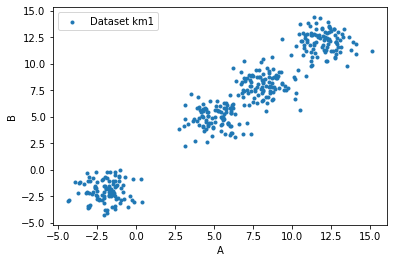

In [2]:
plt.scatter(km1.A, km1.B, marker=".")
plt.ylabel('B')
plt.xlabel('A')
plt.legend(["Dataset km1"])
plt.show()

> Para el dataset km1 se puede observar que los datos estan distribuidos para la columna A y B entre (-5,15), se puede inferir de acuerdo al grafico que la cantidad de cluster en la que estan distribuidos los datos es 4.*

* Aplicar el algoritmo k-means disponible en Scikit-Learn y observe los outputs disponiles (centroides, clusters asignados y distancia dentro de las clases)

In [3]:
k_means = KMeans(n_clusters=4)
k_means.fit(km1)

KMeans(n_clusters=4)

> De acuerdo al grafico presentado, se estipula una cantidad de n_clusters = 3 para el analisis.

* Los centroides para cada clases son las siguientes:

In [4]:
k_means.cluster_centers_

array([[ 8.20621583,  8.08967922],
       [ 5.06877653,  4.95259781],
       [-1.92438992, -1.96702231],
       [11.98408224, 12.13107349]])

* La sumatoria de las distancias del centroide son calculadas con "inertia" y corresponde a:

In [5]:
k_means.inertia_

789.0012783558574

* Se puede observar a que cluster se asigno cada uno de los objetos con "labels"

In [6]:
k_means.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3,

* Ajustar k-means considerando 1,2,...10 clusters, guardando las distancias intra clases en un diccionario
* Utilizando matplotlib (o seaborn) genere un gráfico que presente la distancia intra clases. Utilizando el criterio del codo, defina el número de clusters

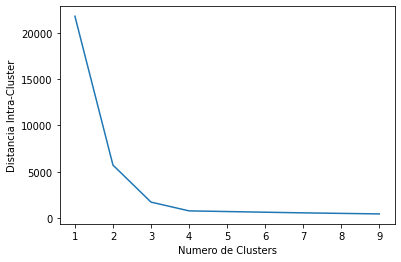

In [7]:
distc = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(km1)
    distc[k] = kmeans.inertia_  #retorna la suma de las distancias al 
                              #cuadrado desde cada punto al centroide del cluster más cercano
plt.figure()
plt.plot(list(distc.keys()), list(distc.values()))
plt.xlabel("Numero de Clusters")
plt.ylabel("Distancia Intra-Cluster")
plt.show()

> De acuerdo al grafico anterior se puede observar que segun el criterio del codo se deberian considerar 3 clases para los datos entregados, sin embargo de manera visual podria inferirse otra cosa.
* A modo de ejercicio y para clarificar los resultados se opto por utilizar el mismo criterio y su representacion grafica por _Yellowbrick_ usando **KElbowVisualizer** para representar de mejor manera el criterio y los resultados.

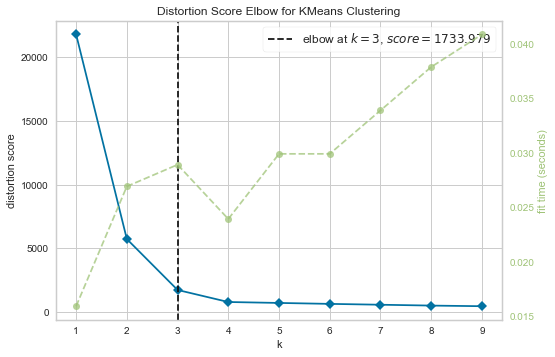

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()                                        # modelo usado para K-Means
visualizer = KElbowVisualizer(model, k=(1,10))          # Considerando el modelo y la cantidad de clusters indicada de 1 hasta 10

visualizer.fit(km1)        
visualizer.show()      

> _Yellowbrick_ nos indica graficamente en donde se encuentra especificamente el codo en donde se define la cantidad de clusters para el modelo, se observa que __elbow__ en la linea vertical para una cantidad de clusters de n=3, a diferencia de lo inferido en las graficas anteriores.

### Análisis de clusters

* Cargar la base de datos k-means2.csv y genere un análisis descriptivo de la base de datos

In [9]:
km2 = pd.read_csv("kmeans2.csv")
km2.head()      # inspeccion de los datos

,Unnamed: 0,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


* Se elimina la columna "Unnamed:0" que es un duplicado de los index de la tabla.

In [10]:
km2 = km2.drop(["Unnamed: 0"], axis=1) 
km2.head()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


* Se procede a preprocesar los datos para el algoritmo K-means, disminuyendo la dimensionalidad del dataset por medio del metodo de _Analisis de componentes principales_, reduciendo de 13 descriptores a 2.

In [11]:
from sklearn.preprocessing import StandardScaler    # Normalizacion de datos 
from sklearn.decomposition import PCA               # analisis de componentes principales

In [12]:
norm = StandardScaler()
k2_std = norm.fit_transform(km2)
k2_std.shape

(5000, 13)

In [13]:
pca = PCA(n_components=2)

k2_transformada = pca.fit_transform(k2_std)

k2_transformada = pd.DataFrame(k2_transformada, columns = ['K1', 'K2'])

* Se observa que el dataframe a dos dimesnsiones para su posterior analisis con K-means.

In [14]:
k2_transformada.shape

(5000, 2)

> La representacion grafica de la nueva dimensionalidad es la siguiente:

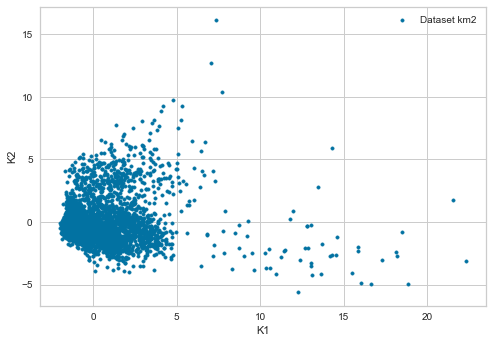

In [15]:
plt.scatter(k2_transformada.K1, k2_transformada.K2, marker=".")
plt.ylabel('K2')
plt.xlabel('K1')
plt.legend(["Dataset km2"])
plt.show()

* Para clarificar los resultados se opto por utilizar el mismo criterio y su representacion grafica por _Yellowbrick_ usando **KElbowVisualizer** para representar de mejor manera el criterio y los resultados.

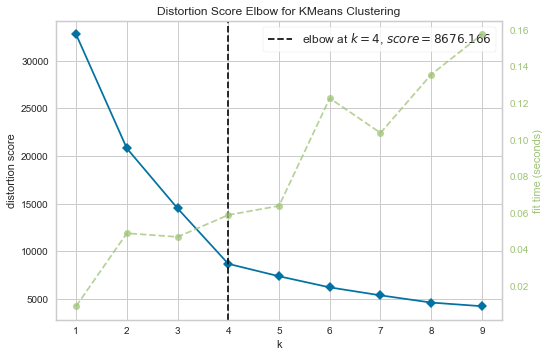

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
model = KMeans()                                        # modelo usado para K-Means
visualizer = KElbowVisualizer(model, k=(1,10))          # Considerando el modelo y la cantidad de clusters indicada de 1 hasta 10

visualizer.fit(k2_transformada)        
visualizer.show()      

* Segun el criterio del codo visto en el grafico anterio la cantidad de cluster es de n=4, por lo que se procede el analisis para su visualizacion.

In [17]:
k_means = KMeans(n_clusters=4)
k_means.fit(k2_transformada)
k_means.cluster_centers_

array([[-0.9705384 , -0.13405017],
       [ 1.86206921, -0.98067104],
       [ 1.58946626,  3.77383964],
       [12.8896012 , -2.04756778]])

* Los primeros 3 centroides estan seccionados dentro del nucleo mas grande de los datos, cercanos entre si, mientras que el cuarto son los datos que estan mas alejados con su centroide en (12.9, -2.04)

In [18]:
k2_transformada['clase'] = k_means.labels_

* La representacion grafica y vista de cada uno de los clusters es la siguiente:

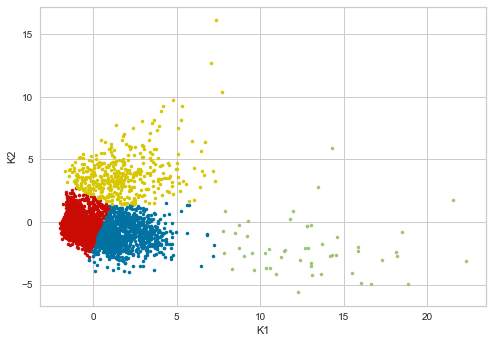

In [53]:
colores = ['r.', 'b.', 'y.', 'g.']
for i in range(0,4):
    plt.plot(k2_transformada['K1'][k2_transformada['clase']==i],k2_transformada['K2'][k2_transformada['clase']==i],colores[i])

plt.ylabel('K2')
plt.xlabel('K1')
plt.show()

* Aplique el clustering jerárquico. Visualice el dendograma y determine el número de clusters.

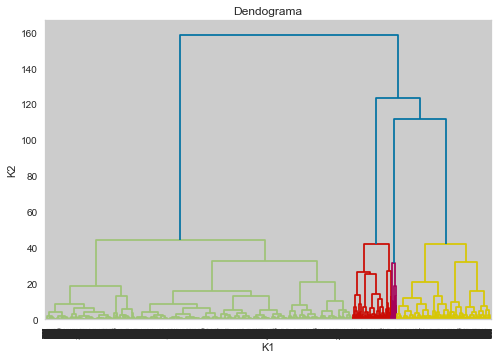

In [20]:
import scipy.cluster.hierarchy as sch
dendrograma = sch.dendrogram(sch.linkage(k2_transformada, method = 'ward'))

plt.title('Dendograma')
plt.xlabel('K1')
plt.ylabel('K2')
plt.show()

* **Al visualizar el dendograma donde observamos la distancia máxima, nos genera 4 clusters para los datos, lo que concuerda con el metodo anterior k_means.**